In [13]:
import pickle
import os
import pandas
import matplotlib.pyplot as plt
import numpy as np

The following figure shows the training results comparsion between our training script and the training script used in KubeML

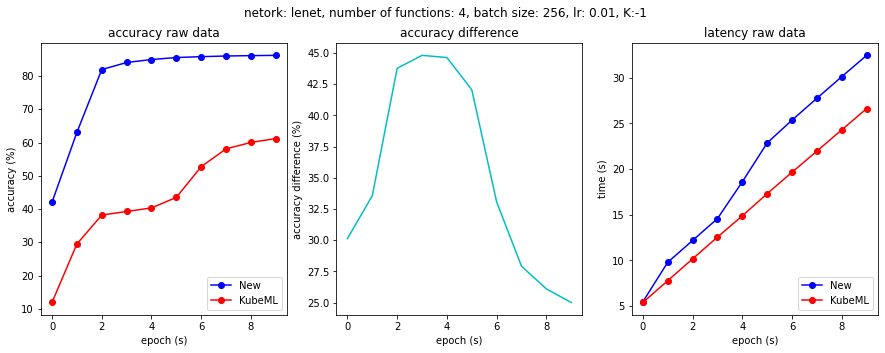

In [14]:


network = 'lenet'
epoch = 10
batch_size = 256
lr = 0.01
number_of_workers = 4
K = -1

x = np.arange(0, epoch, 1)
s1 = [42.03625,63.03375,81.9333125,84.057125,84.9506875,85.5478125,85.8135625,86.009125,86.126625,86.20575]
s2 = [11.903375,29.4735625,38.1713125,39.2568125,40.3255625,43.4975,52.7379375,58.0863125,60.023,61.1860625]
t1 = [5.457774906,9.782245339,12.176089689,14.571715438,18.601404471,22.863780307,25.365972391,27.756485676,30.129820247,32.461802514]
t2 = [5.386531497,7.765003306,10.161454515,12.544810814,14.875170792,17.304278348,19.657037876,21.96916034,24.299020951,26.624509498]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(x, s1, "-bo", label="New")
ax[0].plot(x, s2, "-ro", label="KubeML")
ax[0].set_title('accuracy raw data')
ax[0].legend(loc="lower right")
ax[0].set(xlabel='epoch (s)', ylabel='accuracy (%)')


# ax[1].plot(t, (np.divide(s1, s2) - 1)*100, "-b")
# ax[1].set_title('improvement')
# ax[1].set(xlabel='epoch (s)', ylabel='accuracy improvement (%)')

ax[1].plot(x, np.subtract(s1, s2), "-c")
ax[1].set_title('accuracy difference')
ax[1].set(xlabel='epoch (s)', ylabel='accuracy difference (%)')

ax[2].plot(x, t1, "-bo", label="New")
ax[2].plot(x, t2, "-ro", label="KubeML")
ax[2].set_title('latency raw data')
ax[2].legend(loc="lower right")
ax[2].set(xlabel='epoch (s)', ylabel='time (s)')

fig.suptitle(f'netork: {network}, number of functions: {number_of_workers}, batch size: {batch_size}, lr: {lr}, K:{K}')
#fig.savefig("test.png")
plt.show()

The following experiments compare the improvement of saving optimizer states after every global model aggregation in different configurations.

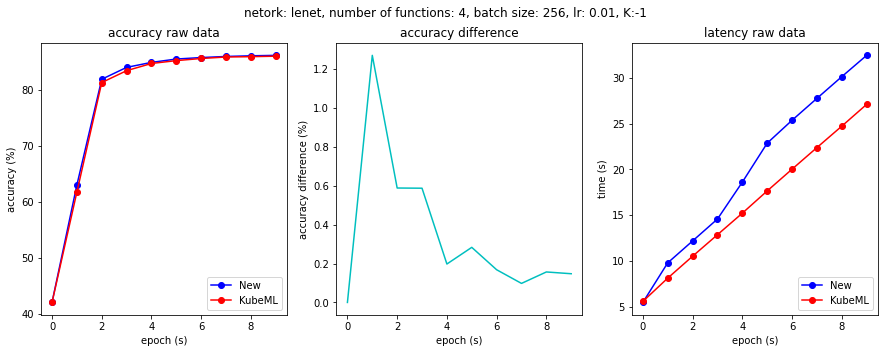

In [15]:
#The baseline setting


network = 'lenet'
epoch = 10
batch_size = 256
lr = 0.01
number_of_workers = 4
K = -1

x = np.arange(0, epoch, 1)
s1 = [42.03625,63.03375,81.9333125,84.057125,84.9506875,85.5478125,85.8135625,86.009125,86.126625,86.20575]
s2 = [42.03625,61.7621875,81.3444375,83.46925,84.7529375,85.2643125,85.64525,85.911125,85.96975,86.058]
t1 = [5.457774906,9.782245339,12.176089689,14.571715438,18.601404471,22.863780307,25.365972391,27.756485676,30.129820247,32.461802514]
t2 = [5.565376388,8.114203012,10.505832845,12.857288719,15.211397327,17.643232696,20.019266469,22.380032589,24.721291299,27.10300563]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(x, s1, "-bo", label="New")
ax[0].plot(x, s2, "-ro", label="KubeML")
ax[0].set_title('accuracy raw data')
ax[0].legend(loc="lower right")
ax[0].set(xlabel='epoch (s)', ylabel='accuracy (%)')


# ax[1].plot(t, (np.divide(s1, s2) - 1)*100, "-b")
# ax[1].set_title('improvement')
# ax[1].set(xlabel='epoch (s)', ylabel='accuracy improvement (%)')

ax[1].plot(x, np.subtract(s1, s2), "-c")
ax[1].set_title('accuracy difference')
ax[1].set(xlabel='epoch (s)', ylabel='accuracy difference (%)')

ax[2].plot(x, t1, "-bo", label="New")
ax[2].plot(x, t2, "-ro", label="KubeML")
ax[2].set_title('latency raw data')
ax[2].legend(loc="lower right")
ax[2].set(xlabel='epoch (s)', ylabel='time (s)')

fig.suptitle(f'netork: {network}, number of functions: {number_of_workers}, batch size: {batch_size}, lr: {lr}, K:{K}')
#fig.savefig("test.png")
plt.show()



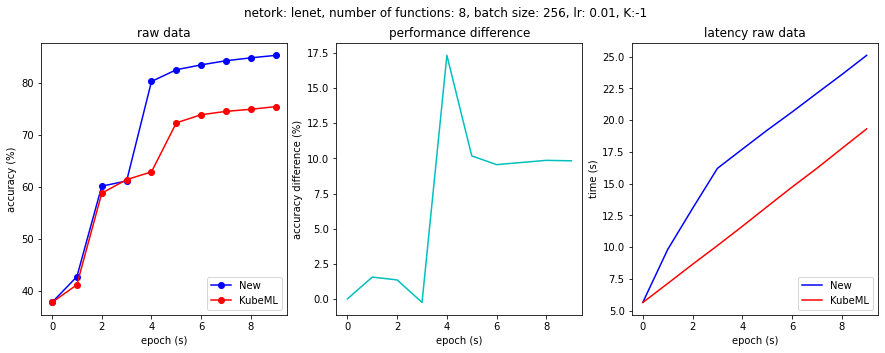

In [16]:
network = 'lenet'
epoch = 10
batch_size = 256
lr = 0.01
number_of_workers = 8
K = -1

t = np.arange(0, epoch, 1)
s1 = [37.852875,42.79525,60.141125,61.14,80.216875,82.463,83.395125,84.1895,84.743625,85.21825]
s2 = [37.852875,41.24425,58.7945,61.395125,62.88225,72.286375,73.84025,74.4805,74.88375,75.39075]

t1 = [5.662639642,9.820669001,13.053851315,16.206432212,17.713008018,19.208121841,20.636380032,22.117407012,23.582670923,25.098368025]
t2 = [5.652591978,7.144994251,8.655530728,10.128531536,11.641386023999999,13.19413275,14.731891623,16.210223952,17.768070462,19.311277177]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(t, s1, "-bo", label="New")
ax[0].plot(t, s2, "-ro", label="KubeML")
ax[0].set_title('raw data')
ax[0].legend(loc="lower right")
ax[0].set(xlabel='epoch (s)', ylabel='accuracy (%)')


# ax[1].plot(t, (np.divide(s1, s2) - 1)*100, "-b")
# ax[1].set_title('improvement')
# ax[1].set(xlabel='epoch (s)', ylabel='accuracy improvement (%)')

ax[1].plot(t, np.subtract(s1, s2), "-c")
ax[1].set_title('performance difference')
ax[1].set(xlabel='epoch (s)', ylabel='accuracy difference (%)')

ax[2].plot(x, t1, "-b", label="New")
ax[2].plot(x, t2, "-r", label="KubeML")
ax[2].set_title('latency raw data')
ax[2].legend(loc="lower right")
ax[2].set(xlabel='epoch (s)', ylabel='time (s)')

fig.suptitle(f'netork: {network}, number of functions: {number_of_workers}, batch size: {batch_size}, lr: {lr}, K:{K}')
#fig.savefig("test.png")
plt.show()

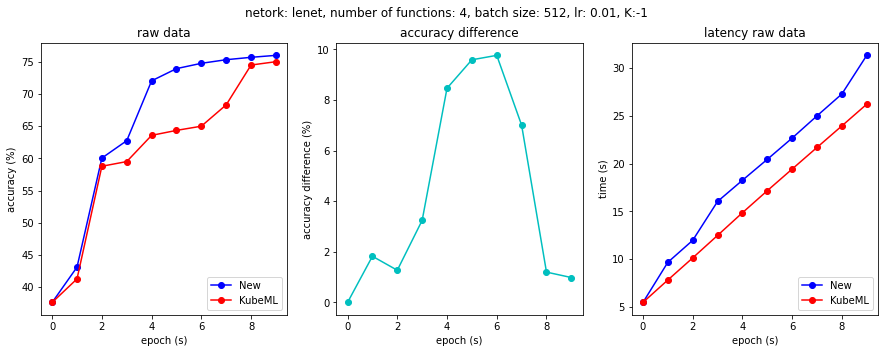

In [17]:
# number of workers
network = 'lenet'
epoch = 10
batch_size = 512
lr = 0.01
number_of_workers = 4
K = -1

t = np.arange(0, epoch, 1)
s1 = [37.6485,43.1290625,60.0636875,62.7625625,72.05325,73.94875,74.774375,75.3335,75.704875,76.0091875]
s2 = [37.6485,41.304375,58.7910625,59.5196875,63.5880625,64.36,65.0103125,68.3278125,74.505875,75.02525]

t1= [5.4855673209999996,9.679668726,11.974150272,16.035659704,18.251611553,20.437982243,22.660326143,24.984280889,27.269232073,31.303289197]
t2= [5.490155567,7.829073352,10.138877154,12.489026419,14.858758603,17.162361727,19.423430586,21.683898528,23.933956538,26.20172441]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(t, s1, "-bo", label="New")
ax[0].plot(t, s2, "-ro", label="KubeML")
ax[0].set_title('raw data')
ax[0].legend(loc="lower right")
ax[0].set(xlabel='epoch (s)', ylabel='accuracy (%)')


# ax[1].plot(t, (np.divide(s1, s2) - 1)*100, "-b")
# ax[1].set_title('improvement')
# ax[1].set(xlabel='epoch (s)', ylabel='accuracy improvement (%)')

ax[1].plot(t, np.subtract(s1, s2), "-co")
ax[1].set_title('accuracy difference')
ax[1].set(xlabel='epoch (s)', ylabel='accuracy difference (%)')

ax[2].plot(x, t1, "-bo", label="New")
ax[2].plot(x, t2, "-ro", label="KubeML")
ax[2].set_title('latency raw data')
ax[2].legend(loc="lower right")
ax[2].set(xlabel='epoch (s)', ylabel='time (s)')

fig.suptitle(f'netork: {network}, number of functions: {number_of_workers}, batch size: {batch_size}, lr: {lr}, K:{K}')
#fig.savefig("test.png")
plt.show()

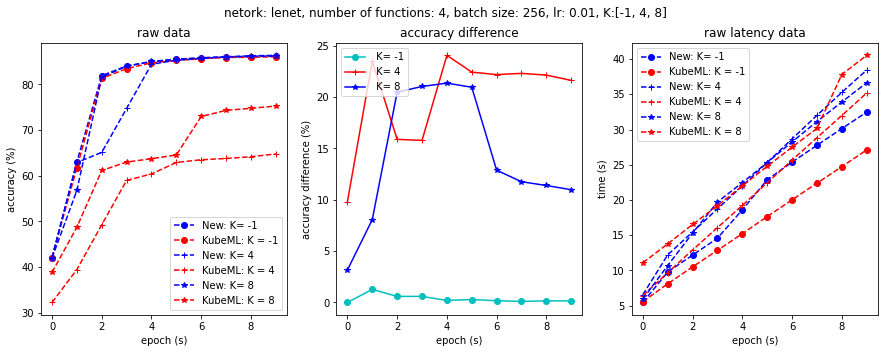

In [18]:
# different model averaging frequency



network = 'lenet'
epoch = 10
batch_size = 256
lr = 0.01
number_of_workers = 4

K = [-1, 4, 8]

t = np.arange(0, epoch, 1)



s1_0 = [42.03625,63.03375,81.9333125,84.057125,84.9506875,85.5478125,85.8135625,86.009125,86.126625,86.20575]
s2_0 =  [42.03625,61.7621875,81.3444375,83.46925,84.7529375,85.2643125,85.64525,85.911125,85.96975,86.058]

t1_0 = [5.457774906,9.782245339,12.176089689,14.571715438,18.601404471,22.863780307,25.365972391,27.756485676,30.129820247,32.461802514]
t2_0 = [5.565376388,8.114203012,10.505832845,12.857288719,15.211397327,17.643232696,20.019266469,22.380032589,24.721291299,27.10300563]

s1_4 = [42.02575,62.89925,65.108625,74.743,84.431,85.3133125,85.6769375,86.0693125,86.285125,86.3823125]
s2_4 = [32.2169375,39.4300625,49.23975,58.9714375,60.385375,62.9010625,63.503,63.777125,64.15975,64.774375]

t1_4 = [6.549751919,12.216109419,15.458368441,18.744775521,21.995541206,25.313436382,28.667720717,32.002966776,35.262468086,38.436780875]
t2_4 = [6.430778649,9.682824243,12.906450022,16.070283737,19.225478767,22.429390576,25.658119363,28.830270238,31.976149612,35.178931304]

s1_8 = [41.946875,56.7765625,81.6165,83.998,85.0775,85.4808125,85.8530625,86.0678125,86.1549375,86.23375]
s2_8 = [38.7928125,48.712375,61.148875,62.9820625,63.7345,64.5371875,72.9814375,74.320875,74.7738125,75.263125]
t1_8 = [5.944860538,10.697270616,15.299871867,19.702567101,22.457225417,25.308299776,28.240441894,31.129034482,33.900781178,36.63544348]
t2_8 = [11.087092421,13.773821747,16.521956588,19.197254394,21.998458244,24.778041925,27.498452742,30.152108494,37.798130302,40.526331121]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].plot(t, s1_0, '--bo', label="New: K= -1")
ax[0].plot(t, s2_0, '--ro', label="KubeML: K = -1")
ax[0].plot(t, s1_4, '--b+', label="New: K= 4")
ax[0].plot(t, s2_4, '--r+', label="KubeML: K = 4")
ax[0].plot(t, s1_8, '--b*',label="New: K= 8")
ax[0].plot(t, s2_8, '--r*',label="KubeML: K = 8")
ax[0].set_title('raw data')
ax[0].legend(loc="lower right")
ax[0].set(xlabel='epoch (s)', ylabel='accuracy (%)')


# ax[1].plot(t, (np.divide(s1, s2) - 1)*100, "-b")
# ax[1].set_title('improvement')
# ax[1].set(xlabel='epoch (s)', ylabel='accuracy improvement (%)')

ax[1].plot(t, np.subtract(s1_0, s2_0), "-co", label=" K= -1")
ax[1].plot(t, np.subtract(s1_4, s2_4), "-r+", label=" K= 4")
ax[1].plot(t, np.subtract(s1_8, s2_8), "-b*", label=" K= 8")
ax[1].legend(loc="upper left")

ax[1].set_title('accuracy difference')
ax[1].set(xlabel='epoch (s)', ylabel='accuracy difference (%)')

ax[2].plot(x, t1_0, '--bo', label="New: K= -1")
ax[2].plot(x, t2_0, '--ro', label="KubeML: K = -1")
ax[2].plot(x, t1_4, '--b+', label="New: K= 4")
ax[2].plot(x, t2_4, '--r+', label="KubeML: K = 4")
ax[2].plot(x, t1_8, '--b*',label="New: K= 8")
ax[2].plot(x, t2_8, '--r*',label="KubeML: K = 8")
ax[2].set_title('raw latency data')
ax[2].legend(loc="upper left")
ax[2].set(xlabel='epoch (s)', ylabel='time (s)')


fig.suptitle(f'netork: {network}, number of functions: {number_of_workers}, batch size: {batch_size}, lr: {lr}, K:{K}')
#fig.savefig("test.png")
plt.show()
